# Week2授業課題1 二次元配列と勾配問題

## 【問題1】1次関数
$x$が-50から50の範囲で次の式を考えます。<br>

<br>

$$
y = \frac{1}{2}x + 1
$$

<br>

-50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください。

In [1]:
import numpy as np

#xの最後の要素が50になるように、rangeの最終値を50.1とする
#次の問題で結合するため、1列になるようreshapeを実行
x = np.reshape(np.arange(-50, 50.1, 0.1), (-1, 1))
y = np.reshape(0.5*x + 1, (-1, 1))

print("xの形：{}".format(x.shape))
print("yの形：{}".format(y.shape))

xの形：(1001, 1)
yの形：(1001, 1)


## 【問題2】配列の結合
問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。0列目にx、1列目にyが来るようにします。

In [2]:
x_y = np.concatenate((x, y), axis=1)

print(x_y)

[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]


## 【問題3】勾配を求める
各x座標における勾配を求めます。ここで勾配はyの変化量をxの変化量で割ることで計算します。<br>

<br>

![image](https://t.gyazo.com/teams/diveintocode/7fd04c4808b8a0150a49c908e21f3cd2.png)<br>

<br>

各変化量は以下の図のように隣同士の要素の差から近似的に求めます。
![image2](https://t.gyazo.com/teams/diveintocode/398d8c5b4b1bd4151dea6488059226a1.png)<br>

<br>

In [2]:
#xの変化量を求める
dx = x[1:] - x[:-1]
#yの変化量を求める
dy = y[1:] - y[:-1]

#勾配を求める
grad = dy/dx

print("勾配配列の形：{}".format(grad.shape))

勾配配列の形：(1000, 1)


## 【問題4】グラフを描く
1次関数のグラフをMatplotlibを用いて描いてください。また、それとは別に横軸をx、縦軸を勾配としたグラフも描いてください。

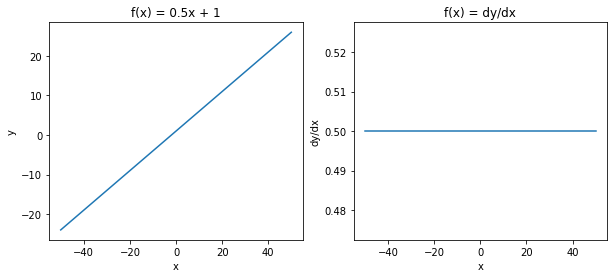

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(1, 2, figsize=(10,4))

#横軸x、縦軸yを描画
axs[0].set_title("f(x) = 0.5x + 1")
axs[0].set_ylabel("y")
axs[0].set_xlabel("x")
axs[0].plot(x, y)

#横軸x、縦軸gradを描画
#gradの要素数はxより１少ないため、xをスライスして要素数を合わせる
axs[1].set_title("f(x) = dy/dx")
axs[1].set_ylabel("dy/dx")
axs[1].set_xlabel("x")
axs[1].plot(x[1:], grad)

plt.show()

## 【問題5】Pythonの関数化
問題1から問題3までの範囲をまとめて行うPythonの関数を雛形を参考に作成してください。<br>

そして、以下の3式の勾配を0.1間隔で求めてndarrayで出力してください。

$$
y = x^{2} \quad (-50\leq x \leq 50)\\
y = 2x^{2}+2^{x} \quad (-50\leq x \leq 50)\\
y = sin(x^{\frac{1}{2}}) \quad (0\leq x \leq 50)
$$

また、問題4と同様にグラフを描いてください。

ndarrayに対して三角関数のsinの計算を行うには`np.sin()`を用います。

In [8]:
#式１　y = x^2
def func1(X):
    y = X**2
    return y

#式２　y = 2x^2 + 2^x
def func2(X):
    y = 2 * X**2 + 2**x
    return y

#式３　y = sin(x^0.5)
def func3(X):
    y = np.sin(X**0.5)
    return y

#f(x)のdy/dxを求める関数を作成
def compute_gradient(func, x_range=(-50, 50, 0.1)):
    
    x = np.reshape(np.arange(x_range[0], x_range[1] + x_range[2], x_range[2]),
                   (-1, 1))
    y = np.reshape(func(x), (-1, 1))

    array_xy = np.concatenate((x, y), axis=1)

    dx = x[1:] - x[:-1]
    dy = y[1:] - y[:-1]

    grad = dy/dx

    return array_xy, grad

In [9]:
#式１　y = x^2
func1_array, func1_grad = compute_gradient(func1)
print(func1_grad)

#式２　y = 2x^2 + 2^x
func2_array, func2_grad = compute_gradient(func2)
print(func2_grad)

#式３　y = sin(x^0.5)
func3_array, func3_grad = compute_gradient(func3, x_range=(0, 50, 0.1))
print(func3_grad)

[[-99.9]
 [-99.7]
 [-99.5]
 [-99.3]
 [-99.1]
 [-98.9]
 [-98.7]
 [-98.5]
 [-98.3]
 [-98.1]
 [-97.9]
 [-97.7]
 [-97.5]
 [-97.3]
 [-97.1]
 [-96.9]
 [-96.7]
 [-96.5]
 [-96.3]
 [-96.1]
 [-95.9]
 [-95.7]
 [-95.5]
 [-95.3]
 [-95.1]
 [-94.9]
 [-94.7]
 [-94.5]
 [-94.3]
 [-94.1]
 [-93.9]
 [-93.7]
 [-93.5]
 [-93.3]
 [-93.1]
 [-92.9]
 [-92.7]
 [-92.5]
 [-92.3]
 [-92.1]
 [-91.9]
 [-91.7]
 [-91.5]
 [-91.3]
 [-91.1]
 [-90.9]
 [-90.7]
 [-90.5]
 [-90.3]
 [-90.1]
 [-89.9]
 [-89.7]
 [-89.5]
 [-89.3]
 [-89.1]
 [-88.9]
 [-88.7]
 [-88.5]
 [-88.3]
 [-88.1]
 [-87.9]
 [-87.7]
 [-87.5]
 [-87.3]
 [-87.1]
 [-86.9]
 [-86.7]
 [-86.5]
 [-86.3]
 [-86.1]
 [-85.9]
 [-85.7]
 [-85.5]
 [-85.3]
 [-85.1]
 [-84.9]
 [-84.7]
 [-84.5]
 [-84.3]
 [-84.1]
 [-83.9]
 [-83.7]
 [-83.5]
 [-83.3]
 [-83.1]
 [-82.9]
 [-82.7]
 [-82.5]
 [-82.3]
 [-82.1]
 [-81.9]
 [-81.7]
 [-81.5]
 [-81.3]
 [-81.1]
 [-80.9]
 [-80.7]
 [-80.5]
 [-80.3]
 [-80.1]
 [-79.9]
 [-79.7]
 [-79.5]
 [-79.3]
 [-79.1]
 [-78.9]
 [-78.7]
 [-78.5]
 [-78.3]
 [-78.1]
 [-77.9]
 

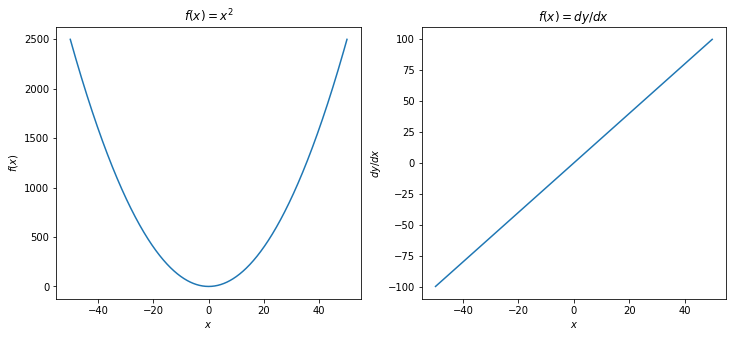

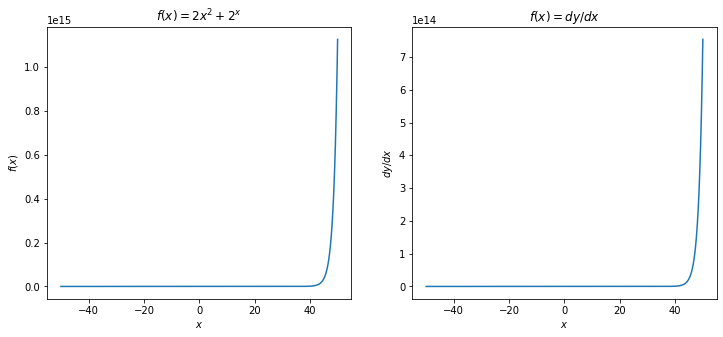

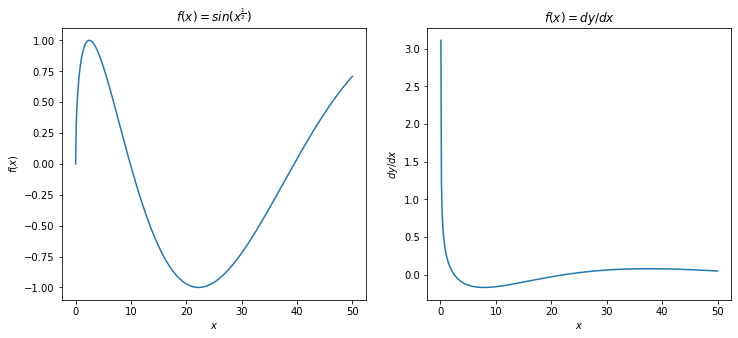

In [19]:
%matplotlib inline

for i, (array, grad, label) in enumerate(zip([func1_array, func2_array, func3_array],
                                             [func1_grad, func2_grad, func3_grad],
                                             ['$f(x)=x^2$', '$f(x)=2x^2+2^x$', '$f(x)=sin(x^{\\frac{1}{2}})$'])):

    plt.figure(figsize=(12,5))
    
    plt.subplot(121)
    #横軸x、縦軸yを描画
    plt.title(label)
    plt.ylabel("$f(x)$")
    plt.xlabel("$x$")
    plt.plot(array[:,0], array[:,1])

    plt.subplot(122)
    #横軸x、縦軸gradを描画
    #gradの要素数はxより１少ないため、xをスライスして要素数を合わせる
    plt.title("$f(x)=dy/dx$")
    plt.ylabel("$dy/dx$")
    plt.xlabel("$x$")
    plt.plot(array[1:,0], grad)

    plt.show()

## 【問題6】最小値を求める
問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。

今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。

また、最小のyをとる前後の勾配を表示してください。

In [54]:
for array, grad, label in zip([func1_array, func2_array, func3_array],
                              [func1_grad, func2_grad, func3_grad],
                              ['x^2', '2x^2+2^x', 'sin(x^0.5)']):
    
    func_min = array[:,1].min()
    print('{} の最小値：{:.2f}'.format(label, func_min))
    
    func_grad1 = grad[array[:,1].argmin() - 1, 0]
    func_grad2 = grad[array[:,1].argmin(), 0]
    print('最小値の前後の勾配：{:.4f}, {:.4f}\n'.format(func_grad1, func_grad2))

x^2 の最小値：0.00
最小値の前後の勾配：-0.1000, 0.1000

2x^2+2^x の最小値：0.95
最小値の前後の勾配：-0.4170, 0.0248

sin(x^0.5) の最小値：-1.00
最小値の前後の勾配：-0.0006, 0.0005

